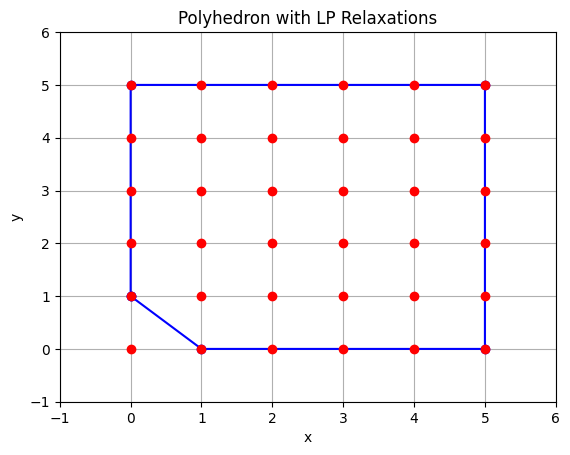

In [8]:
import numpy as np

import matplotlib.pyplot as plt

# Define the vertices of the polyhedron
vertices = np.array([[0, 1],[1,0], [5, 0], [5, 5], [0, 5],[0,1]])

# Create the plot
fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'bo-')  # Draw the polyhedron

# Draw dots at each integer point
for x in range(6):
	for y in range(6):
		ax.plot(x, y, 'ro')

# Set the scale of the axes
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)

# Add grid
ax.grid(True)

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Polyhedron with LP Relaxations')

plt.savefig('lp_relaxed_polyhedron.png')
plt.show()

# Additional Problem 5.5

## Part c

In [37]:
import cvxpy as cp
import numpy as np

n = 5
m = 5

x = cp.Variable(n)
z = cp.Variable()

p = np.array([
    0.50, 0.60, 0.60, 0.60, 0.20
])

q = np.array([
    10, 5, 5, 20, 10
])

S = [
    [1,2],
    [4],
    [1,4,5],
    [2,5],
    [3]
]

Z = np.zeros((m,n))

for i, arr in enumerate(S):
    for val in arr:
        Z[val-1,i] = 1
        

constraints = [z * np.ones(n) >= Z @ x,
               x >= 0,
               x <= q]


obj = cp.Maximize( p.T @ x - z)

prob_wc = cp.Problem(obj, constraints)

constraints_q = [z * np.ones(n) >= Z @ x,
               x >= 0,
               x == q]

prob_q = cp.Problem(obj, constraints_q)

print(f"The optimal worst case profit is {prob_wc.solve()}")
print(f"The worst case profit if all qs are accepted is {prob_q.solve()}")
print(f"Dual variables: {constraints[0].dual_value}")

The optimal worst case profit is 3.4999999940788573
The worst case profit if all qs are accepted is -5.0000000004228475
Dual variables: [0.08899928 0.41100072 0.11154698 0.19945374 0.18899928]
